## Using Basic dataframe which is generated for the t-6 hours for the sepsis prediction.

We have followed the same framework which is used for the t-6 hours prediction for t-12 hours also.

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as clf1
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_score, classification_report,average_precision_score, accuracy_score, balanced_accuracy_score, precision_recall_curve, f1_score, auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import eli5
from eli5.sklearn import PermutationImportance
print("All Libraries are imported")


All Libraries are imported


#### Used Following code to get t-12 hours as 1 & saved in the CSV. Importing the updated CSV for further analysis & experiment.


In [ ]:

# df = pd.read_csv('training_a.csv', sep = ',')
# df['Sepsis t-12'] = 'NaN'
# df_1 = df[['Patient_ID', 'Hour', 'SepsisLabel']]
# df_1['Sepsis t-12'] = 'NaN'
# patient_ids = list(df_1['Patient_ID'].unique())

# for i in patient_ids:
#     if (len(df_1[df_1['Patient_ID'] == i]) < 6):
#         for index, row in df_1[df_1['Patient_ID'] == i].iterrows():
#             df_1.at[index,'Sepsis t-12'] = 0
#     else:
#         j = 0
#         k = 0
#         for index, row in df_1[df_1['Patient_ID'] == i].iterrows():
#             j = index
#             break
#         j = j + len(df_1[df_1['Patient_ID'] == i])
#         for index, row in df_1[df_1['Patient_ID'] == i].iterrows():
#             if(index <= j-7):
#                 if (df_1.at[index+6,'SepsisLabel'] == 1):
#                     df_1.at[index,'Sepsis t-12'] = 1
#                 else:
#                     df_1.at[index,'Sepsis t-12'] = 0
#             else:
#                 if (df_1.at[index-1,'Sepsis t-12'] == 1):
#                     df_1.at[index,'Sepsis t-12'] = 1
#                 else:
#                     df_1.at[index,'Sepsis t-12'] = 0

# df[['Sepsis t-12']] = df_1[['Sepsis t-12']]
# df.rename(columns = {'Sepsis t-12':'SepsisLabel'}, inplace = True)
# df.to_csv('training_a_t12.csv', index = False)

# # read the data into a Pandas DataFrame trainng_a_t12.csv

In [1]:

df = pd.read_csv('/kaggle/input/training-a-t12/training_a_t12.csv')
print(len(df))
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/training-a-t12/training_a_t12.csv'

In [8]:
df_v = pd.read_csv('/kaggle/input/trainb/data_train_b.csv')
print(len(df_v))
df_v.head()

761995


,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,1,0,100001
1,1,1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,2,0,100001
2,2,2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,3,0,100001
3,3,3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,4,0,100001
4,4,4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,5,0,100001


In [14]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

# Data Cleaning

Now that we know what to clean, let's execute our code.

In [35]:
df_1 = pd.DataFrame(columns = ['Column Name', '% Null Values'])
for column in df.columns[1:]:
    df_1.loc[len(df_1.index)] = [column , 100*df[column].isnull().sum()/len(df)]
print(df_1.sort_values(by=['% Null Values'], ascending=False))

         Column Name  % Null Values
7              EtCO2     100.000000
27         TroponinI      99.877881
20  Bilirubin_direct      99.850420
32        Fibrinogen      99.236917
26   Bilirubin_total      98.773372
16      Alkalinephos      98.540650
14               AST      98.504205
22           Lactate      96.565112
30               PTT      95.152459
13              SaO2      95.044387
17           Calcium      95.024392
24         Phosphate      94.951247
33         Platelets      93.482913
19        Creatinine      93.357884
31               WBC      92.489639
23         Magnesium      92.219712
9               HCO3      91.949406
15               BUN      91.840702
18          Chloride      91.676063
12             PaCO2      91.231753
29               Hgb      91.164303
8         BaseExcess      89.574863
25         Potassium      89.137640
11                pH      88.532868
28               Hct      88.223711
21           Glucose      87.768392
10              FiO2      85

In [36]:
original_data = df
missing_data = original_data.isnull().sum()
missing_percent = (missing_data/original_data.shape[0])*100
refined_columns = list(missing_percent[missing_percent < 92].index)
sepsis_data = original_data[refined_columns]

In [37]:
sepsis_data.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN', 'Chloride',
       'Glucose', 'Potassium', 'Hct', 'Hgb', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'Sepsis t-012', 'Patient_ID', 'SepsisLabel'],
      dtype='object')

In [38]:
sepsis_data.shape 

(790215, 28)

In [39]:
SelCol = ['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN', 'Chloride',
       'Glucose', 'Potassium', 'Hct', 'Hgb', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID']

In [40]:
df = sepsis_data

In [42]:
interpolate_df = df.groupby(['Patient_ID']).apply(lambda x: x[SelCol].interpolate(method='linear', limit_direction='both'))
interpolate_df_v = df_v.groupby(['Patient_ID']).apply(lambda x: x[SelCol].interpolate(method='linear', limit_direction='both'))

In [43]:
interpolate_df.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,Hct,Hgb,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,97.0,95.0,36.11,98.0,75.330,NaN,19.0,24.000000,45.0,...,37.2,12.5,83.14,0,NaN,NaN,-0.03,1,0,1
1,1,97.0,95.0,36.11,98.0,75.330,NaN,19.0,24.000000,45.0,...,37.2,12.5,83.14,0,NaN,NaN,-0.03,2,0,1
2,2,89.0,99.0,36.11,122.0,86.000,NaN,22.0,24.000000,45.0,...,37.2,12.5,83.14,0,NaN,NaN,-0.03,3,0,1
3,3,90.0,95.0,36.11,122.0,88.665,NaN,30.0,24.000000,45.0,...,37.2,12.5,83.14,0,NaN,NaN,-0.03,4,0,1
4,4,103.0,88.5,36.11,122.0,91.330,NaN,24.5,23.857143,45.0,...,37.2,12.5,83.14,0,NaN,NaN,-0.03,5,0,1


In [44]:
df = interpolate_df
df_v = interpolate_df_v

# Feature Engineering

In [49]:
def age_code(data):
    data.loc[data['Age'] >=60, 'age_code'] = 0
    data.loc[data['Age'] <10, 'age_code'] = 1
    data.loc[(data['Age'] >=10) & (data['Age'] <60),'age_code'] = 2
    return data

def hr_code(data):
    data.loc[(data['HR'] >= 70) & (data['HR'] < 110 ) & (data['Age'] < 10), 'hr_code'] = 0
    data.loc[(data['HR'] > 60) & (data['HR'] < 100) & data['Age'] >= 10, 'hr_code'] = 0
    data.loc[((data['HR'] < 70) | (data['Age'] >= 110)) & (data['Age']<10), 'hr_code'] = 1
    data.loc[(data['HR'] >= 100) & (data['Age'] >= 10), 'hr_code'] = 1
    data['hr_code'].fillna(2, inplace=True)
    return data

def o2sat_code(data):
    data.loc[(data['O2Sat'] >= 95) & (data['O2Sat'] < 100), 'o2sat_code'] = 0
    data.loc[(data['O2Sat'] < 95) & (data['O2Sat'] >= 0), 'o2sat_code'] = 1
    data['o2sat_code'].fillna(2, inplace=True)
    return data

def temp_code(data):
    data.loc[(data['Temp'] >= 36) & (data['Temp'] < 38),'temp_code'] = 0
    data.loc[(data['Temp'] < 36) | (data['Temp'] >= 38),'temp_code'] = 1
    data['temp_code'].fillna(2, inplace=True)
    return data

def bp_code(data):
    data.loc[(data['SBP'] < 90) & (data['DBP'] < 60), 'bp_code'] = 0
    data.loc[(data['SBP'].between(90,120, inclusive=True)) & (data['DBP'].between(60,80, inclusive=True)), 'bp_code'] = 1
    data.loc[(data['SBP'].between(120,140, inclusive=True)) & (data['DBP'].between(80,90, inclusive=True)),'bp_code'] = 2
    data.loc[(data['SBP'] > 140 ) & (data['DBP'] > 90 ), 'bp_code'] = 3
    data['bp_code'].fillna(4, inplace=True)
    return data

def resp_code(data):
    data.loc[(data['Resp'].between(30, 60)) & (data['Age'] < 1), 'resp_code'] = 0
    data.loc[(data['Resp'].between(24, 40)) & (data['Age'].between(1, 3)), 'resp_code'] = 0
    data.loc[(data['Resp'].between(22, 34)) & (data['Age'].between(3, 6)), 'resp_code'] = 0
    data.loc[(data['Resp'].between(18, 30)) & (data['Age'].between(6, 12)), 'resp_code'] = 0
    data.loc[(data['Resp'].between(12, 16)) & (data['Age'].between(12, 18)), 'resp_code'] = 0
    data.loc[(data['Resp'].between(12, 20)) & (data['Age'] > 18), 'resp_code'] = 0
    
    data.loc[((data['Resp'] < 30) | (data['Resp'] > 60)) & (data['Age'] <1) ,'resp_code'] = 1  
    data.loc[((data['Resp'] < 24) | (data['Resp'] > 40)) & (data['Age'].between(1, 3)) ,'resp_code'] = 1   
    data.loc[((data['Resp'] < 22) | (data['Resp'] > 34)) & (data['Age'].between(3, 6)) ,'resp_code'] = 1
    data.loc[((data['Resp'] < 18) | (data['Resp'] > 30)) & (data['Age'].between(6, 12)) ,'resp_code'] = 1
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 16)) & (data['Age'].between(12, 18)) ,'resp_code'] = 1
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 20)) & (data['Age'] > 18) ,'resp_code'] = 1
    
    data['resp_code'].fillna(2, inplace = True)
                                                            
    return data

def map_code(data):
    data.loc[(data['MAP'] >= 70) & (data['MAP'] < 100),'map_code'] = 0
    data.loc[(data['MAP'] < 70) | (data['MAP'] >= 100),'map_code'] = 1
    data['map_code'].fillna(2, inplace=True)
    return data

def fio2_code(data):
    data.loc[(data['FiO2'] < 0.8 ) ,'fio2_code'] = 0
    data.loc[(data['FiO2'] >= 0.8 ),'fio2_code'] = 1
    data['fio2_code'].fillna(2, inplace=True)
    return data

def ph_code(data):
    data.loc[(data['pH'] >= 7.35) & (data['pH'] < 7.45),'ph_code'] = 0
    data.loc[(data['pH'] < 7.35) | (data['pH'] >= 7.45),'ph_code'] = 1
    data['ph_code'].fillna(2, inplace=True)
    return data

def hco3_code(data):
    data.loc[(data['HCO3'] >= 22) & (data['HCO3'] < 26),'hco3_code'] = 0
    data.loc[(data['HCO3'] < 22) | (data['HCO3'] >= 26),'hco3_code'] = 1
    data['hco3_code'].fillna(2, inplace=True)
    return data

def bun_code(data):
    data.loc[(data['BUN'] >= 10) & (data['BUN'] < 20),'bun_code'] = 0
    data.loc[(data['BUN'] < 10) | (data['BUN'] >= 20),'bun_code'] = 1
    data['bun_code'].fillna(2, inplace=True)
    return data



def masterfunction(data):
    data1 = age_code(data)
    data2 = hr_code(data1)
    data3 = o2sat_code(data2)
    data4 = temp_code(data3)
    data5 = bp_code(data4)
    data6 = resp_code(data5)
    data7 = map_code(data6)
    data8 = fio2_code(data7)
    data9 = ph_code(data8)
    data10 = hco3_code(data9)
    data11 = bun_code(data10)
    return data11

df = masterfunction(df)
df_v = masterfunction(df_v)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.


In [50]:
df.head().T

,0,1,2,3,4
Hour,0.00,1.00,2.00,3.000,4.000000
HR,97.00,97.00,89.00,90.000,103.000000
O2Sat,95.00,95.00,99.00,95.000,88.500000
Temp,36.11,36.11,36.11,36.110,36.110000
SBP,98.00,98.00,122.00,122.000,122.000000
MAP,75.33,75.33,86.00,88.665,91.330000
DBP,NaN,NaN,NaN,NaN,NaN
Resp,19.00,19.00,22.00,30.000,24.500000
BaseExcess,24.00,24.00,24.00,24.000,23.857143
HCO3,45.00,45.00,45.00,45.000,45.000000


In [51]:
df.drop(['Unit1','Unit2'],axis=1,inplace=True)
df_v.drop(['Unit1','Unit2'],axis=1,inplace=True)
df.columns

KeyError: "['Unit1' 'Unit2'] not found in axis"

In [52]:
print('Train columns with null values: \n', df.isnull().sum())
print("-"*10)
print (df.info())
print("-"*10)

print('Test/Validation columns with null values: \n', df_v.isnull().sum())
print("-"*10)
print (df_v.info())
print("-"*10)

df.describe(include = 'all')

Train columns with null values: 
 Hour                0
HR                  9
O2Sat             211
Temp             6746
SBP              9971
MAP                24
DBP            258145
Resp              701
BaseExcess     257035
HCO3            10270
FiO2           286023
pH             236723
PaCO2          259499
BUN              7410
Chloride        10357
Glucose          7433
Potassium        8067
Hct              6156
Hgb              9156
Age                 0
Gender              0
HospAdmTime         8
ICULOS              0
SepsisLabel         0
Patient_ID          0
age_code            0
hr_code             0
o2sat_code          0
temp_code           0
bp_code             0
resp_code           0
map_code            0
fio2_code           0
ph_code             0
hco3_code           0
bun_code            0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 790215 entries, 0 to 790214
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtyp

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,hr_code,o2sat_code,temp_code,bp_code,resp_code,map_code,fio2_code,ph_code,hco3_code,bun_code
count,790215.000000,790206.000000,790004.000000,783469.000000,780244.000000,790191.000000,532070.000000,789514.000000,533180.000000,779945.000000,...,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000
mean,25.332445,84.927417,97.209745,36.930997,121.019686,78.926498,60.748476,18.768839,0.093226,24.573993,...,1.810745,0.598895,0.160787,3.562854,0.380838,0.367842,0.794767,0.861278,0.582876,0.575769
std,27.954160,17.004225,3.172422,0.717040,21.739801,15.025764,13.352571,5.359366,4.044265,4.150572,...,0.391711,0.841192,0.389882,1.088147,0.487417,0.482281,0.941820,0.847711,0.518773,0.512849
min,0.000000,20.000000,20.000000,20.900000,22.000000,20.000000,20.000000,1.000000,-32.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,73.000000,96.000000,36.483333,105.000000,68.670000,52.000000,15.000000,-2.000000,22.000000,...,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,84.000000,98.000000,36.912500,119.000000,77.000000,59.000000,18.000000,0.000000,24.466667,...,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,33.000000,96.000000,99.111111,37.390000,135.000000,88.000000,68.000000,22.000000,2.000000,27.000000,...,2.000000,1.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,335.000000,280.000000,100.000000,42.220000,281.000000,300.000000,298.000000,69.000000,100.000000,55.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [55]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN', 'Chloride',
       'Glucose', 'Potassium', 'Hct', 'Hgb', 'Age', 'Gender', 'HospAdmTime',
       'ICULOS', 'SepsisLabel', 'Patient_ID', 'age_code', 'hr_code',
       'o2sat_code', 'temp_code', 'bp_code', 'resp_code', 'map_code',
       'fio2_code', 'ph_code', 'hco3_code', 'bun_code'],
      dtype='object')

In [56]:
df_train_test = df.copy()
df_train_test = df_train_test.drop([ 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN', 'Chloride',
       'Glucose', 'Potassium', 'Hct', 'Hgb', 'Age'], axis=1)
df_train_test.fillna(method='bfill',inplace = True)
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790215 entries, 0 to 790214
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Hour         790215 non-null  int64  
 1   Gender       790215 non-null  int64  
 2   HospAdmTime  790215 non-null  float64
 3   ICULOS       790215 non-null  int64  
 4   SepsisLabel  790215 non-null  int64  
 5   Patient_ID   790215 non-null  int64  
 6   age_code     790215 non-null  float64
 7   hr_code      790215 non-null  float64
 8   o2sat_code   790215 non-null  float64
 9   temp_code    790215 non-null  float64
 10  bp_code      790215 non-null  float64
 11  resp_code    790215 non-null  float64
 12  map_code     790215 non-null  float64
 13  fio2_code    790215 non-null  float64
 14  ph_code      790215 non-null  float64
 15  hco3_code    790215 non-null  float64
 16  bun_code     790215 non-null  float64
dtypes: float64(12), int64(5)
memory usage: 108.5 MB


In [57]:
df_train_test.isnull().sum()

Hour           0
Gender         0
HospAdmTime    0
ICULOS         0
SepsisLabel    0
Patient_ID     0
age_code       0
hr_code        0
o2sat_code     0
temp_code      0
bp_code        0
resp_code      0
map_code       0
fio2_code      0
ph_code        0
hco3_code      0
bun_code       0
dtype: int64

In [58]:
X = df_train_test.drop(["SepsisLabel"],axis=1)
y = df_train_test["SepsisLabel"]
SMOTE = SMOTE()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = SMOTE.fit_resample(X,y)

print('After undersample dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 759476, 1: 30739})
After undersample dataset shape Counter({0: 759476, 1: 759476})


In [59]:
#Need to check once again
df_train_test.fillna(method='ffill', inplace=True)
feature_df = df_train_test.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]]
target_df = df_train_test.iloc[:,[4]]

In [60]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518952 entries, 0 to 1518951
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Hour         1518952 non-null  int64  
 1   Gender       1518952 non-null  int64  
 2   HospAdmTime  1518952 non-null  float64
 3   ICULOS       1518952 non-null  int64  
 4   Patient_ID   1518952 non-null  int64  
 5   age_code     1518952 non-null  float64
 6   hr_code      1518952 non-null  float64
 7   o2sat_code   1518952 non-null  float64
 8   temp_code    1518952 non-null  float64
 9   bp_code      1518952 non-null  float64
 10  resp_code    1518952 non-null  float64
 11  map_code     1518952 non-null  float64
 12  fio2_code    1518952 non-null  float64
 13  ph_code      1518952 non-null  float64
 14  hco3_code    1518952 non-null  float64
 15  bun_code     1518952 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 185.4 MB


In [61]:
X_res.isnull().sum()

Hour           0
Gender         0
HospAdmTime    0
ICULOS         0
Patient_ID     0
age_code       0
hr_code        0
o2sat_code     0
temp_code      0
bp_code        0
resp_code      0
map_code       0
fio2_code      0
ph_code        0
hco3_code      0
bun_code       0
dtype: int64

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3)

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063266 entries, 1210676 to 492902
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Hour         1063266 non-null  int64  
 1   Gender       1063266 non-null  int64  
 2   HospAdmTime  1063266 non-null  float64
 3   ICULOS       1063266 non-null  int64  
 4   Patient_ID   1063266 non-null  int64  
 5   age_code     1063266 non-null  float64
 6   hr_code      1063266 non-null  float64
 7   o2sat_code   1063266 non-null  float64
 8   temp_code    1063266 non-null  float64
 9   bp_code      1063266 non-null  float64
 10  resp_code    1063266 non-null  float64
 11  map_code     1063266 non-null  float64
 12  fio2_code    1063266 non-null  float64
 13  ph_code      1063266 non-null  float64
 14  hco3_code    1063266 non-null  float64
 15  bun_code     1063266 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 137.9 MB


In [64]:
X_train.columns

Index(['Hour', 'Gender', 'HospAdmTime', 'ICULOS', 'Patient_ID', 'age_code',
       'hr_code', 'o2sat_code', 'temp_code', 'bp_code', 'resp_code',
       'map_code', 'fio2_code', 'ph_code', 'hco3_code', 'bun_code'],
      dtype='object')

In [65]:
LogisticRegressionPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LogisticRegression(C= 1000, penalty='l2'))])
DecisionTreePipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])
RandomForestPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])
GNBPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('Gausian_Naive_Bayes_classifier',GaussianNB(priors=None))])
BBCPipeline = BalancedBaggingClassifier(base_estimator=XGBClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
ABCPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=4)),
                     ('AdaBoostClassifier_classifier',AdaBoostClassifier())])
GBCPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('Gradient_Boosting_classifier',GradientBoostingClassifier())])
SVCPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('Linear_SVC_classifier',LinearSVC())])
LDAPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('LDA_classifier',LDA())])
QDAPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('QDA_classifier',QuadraticDiscriminantAnalysis())])
PerceptronPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('Perceptron_classifier',Perceptron())])

In [66]:
## Defining the pipelines in a list
mypipeline = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline, GNBPipeline, BBCPipeline, ABCPipeline, GBCPipeline, SVCPipeline, LDAPipeline, QDAPipeline, PerceptronPipeline ]

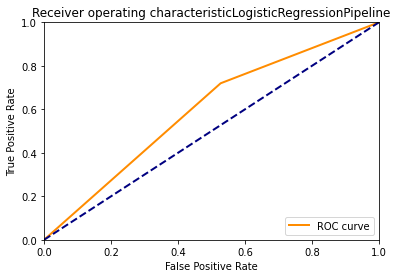

LogisticRegressionPipeline Test Accuracy: 0.5964831045939528
LogisticRegressionPipeline F1 score: 0.6412639078836215
LogisticRegressionPipeline Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.47      0.54    227366
           1       0.58      0.72      0.64    228320

    accuracy                           0.60    455686
   macro avg       0.60      0.60      0.59    455686
weighted avg       0.60      0.60      0.59    455686



In [72]:
#Defining variables for choosing best model

accuracy=0.0
classifier=0
pipeline=""
PipelineDict = {0 :'LogisticRegressionPipeline',1: 'DecisionTreePipeline',2: 'RandomForestPipeline',3:'GNBPipeline', 4:'BBCPipeline', 5:'ABCPipeline', 6:'GBCPipeline', 7:'SVCPipeline', 8:'LDAPipeline', 9:'QDAPipeline', 10:'PerceptronPipeline'}
# Fit the pipelines
for mypipe in mypipeline:
    mypipe.fit(X_train, y_train)

#getting test accuracy for all classifiers
for i,model in enumerate(mypipeline):
    model_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, model_pred)
    perm = PermutationImportance(model_pred, ).fit(X_test, y_test)
    eli5.show_weights(perm, feature_names = X_test.columns.tolist())

          
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #center line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic{}'.format(PipelineDict[i]))
    plt.legend(loc="lower right")
    plt.show()
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))
    print('{} F1 score: {}'.format(PipelineDict[i],f1_score(y_test,model_pred)))
    print("{} Classification Report: \n {}".format(PipelineDict[i],classification_report(y_test,model_pred)))
    


In [68]:
runs = 10
params = {'eta': 0.1, 'max_depth': 15, 'scale_pos_weight': 10, 'objective': 'reg:linear','subsample':0.25,'verbose': False}
xgb_model = None

for i in range(runs):
   
    print("count: ", i+1)

    if True:

        temp, X_cv, label, Y_cv = train_test_split(feature_df,target_df, test_size=0.2)
        xg_train_1 = clf1.DMatrix(temp, label=label)
        xg_test = clf1.DMatrix(X_cv, label=Y_cv)
        model = clf1.train(params, xg_train_1, 50, xgb_model=xgb_model)
        model.save_model('model.model')
        xgb_model = 'model.model'
        
        print(classification_report(Y_cv, (model.predict(xg_test)>0.5).astype(int)))
        print('F1 score:', f1_score(Y_cv, (model.predict(xg_test)>0.5).astype(int)))
    

count:  1
[16:40:36] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:36] WARNING: ../src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    151792
           1       0.88      0.88      0.88      6251

    accuracy                           0.99    158043
   macro avg       0.94      0.94      0.94    158043
weighted avg       0.99      0.99      0.99    158043

F1 score: 0.8770949720670391
count:  2
[16:41:37] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:37] WARNING: ../src/l

KeyboardInterrupt: 